# Fig. 9:  regional freshwater / salt budgets

In [1]:
import os
import sys
import numpy as np
import pickle
import xarray as xr
import cmocean
import cartopy
import warnings  
import cartopy.crs as ccrs
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline
matplotlib.rc_file('rc_file_paper')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [3]:
from tqdm import notebook
from paths import file_ex_ocn_ctrl, file_ex_ocn_lpd
from paths import path_results, path_prace, file_RMASK_ocn, file_RMASK_ocn_low
from FW_plots import FW_region_plot, FW_summary_plot, FW_trend_plot, get_BS_Med
from FW_budget import load_obj, lat_bands
from constants import rho_sw
from timeseries import IterateOutputCESM
from FW_transport import calc_section_transport, sections_high, sections_low
from curly_bracket import curlyBrace
from xr_DataArrays import xr_AREA, xr_DZ
from xr_regression import ocn_field_regression, xr_linear_trend
from xr_regression import xr_regression_with_stats
warnings.filterwarnings('ignore')

BS  FW: 0.14760394166203156
60N FW: -0.4344169163087567
BS  FW: 0.09811436415583094
60N FW: -0.4279843423718501


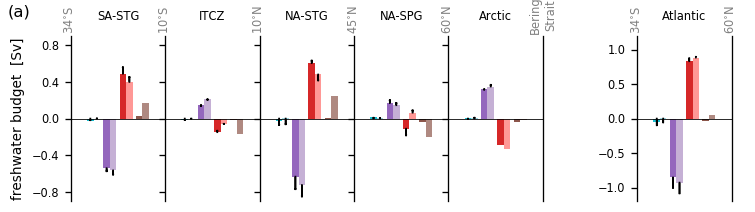

In [4]:
FW_summary_plot('FW')

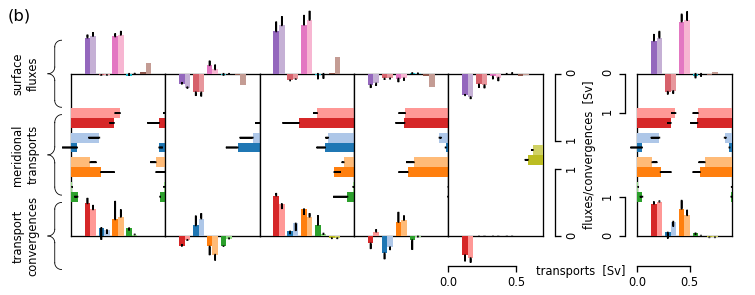

In [5]:
FW_region_plot('FW', empty=False)

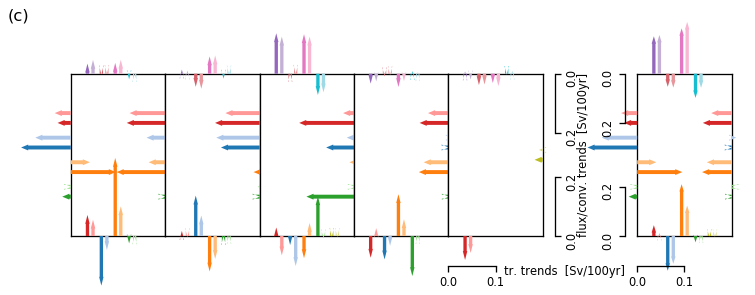

In [6]:
FW_trend_plot('FW', empty=False)

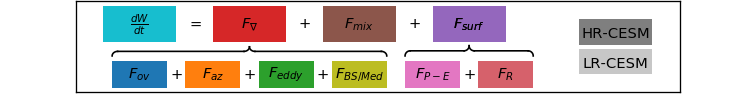

In [7]:
f = plt.figure(figsize=(6.4,0.8))
ax = f.add_axes([0.1,0.02,.8,.96])
# ax.axis('off')
ax.set_xticks([])
ax.set_yticks([])
kw = dict(ha='center', va='center', fontsize=9)
# ax.text(.9/17,.7, 'Eq. (1):', **kw)

ax.add_patch(mpatches.Rectangle([ 2/20,.55], .1, 0.4 , fc=plt.cm.tab20(18), ec="none"))
ax.add_patch(mpatches.Rectangle([ 5/20,.55], .1, 0.4 , fc=plt.cm.tab20( 6), ec="none"))
ax.add_patch(mpatches.Rectangle([ 8/20,.55], .1, 0.4 , fc=plt.cm.tab20(10), ec="none"))
ax.add_patch(mpatches.Rectangle([11/20,.55], .1, 0.4 , fc=plt.cm.tab20( 8), ec="none"))
ax.add_patch(mpatches.Rectangle([15/20,.52], .1, 0.28, fc=plt.cm.tab20(14), ec="none"))
ax.add_patch(mpatches.Rectangle([15/20,.2 ], .1, 0.28, fc=plt.cm.tab20(15), ec="none"))

ax.text(   3/20,.75, r'$\frac{dW}{dt}$', **kw)
ax.text( 4.5/20,.75, r'$=$'            , **kw)
ax.text(   6/20,.75, r'$F_{\nabla}$'   , **kw)
ax.text( 7.5/20,.75, r'$+$'            , **kw)
ax.text(   9/20,.75, r'$F_{mix}$'      , **kw)
ax.text(10.5/20,.75, r'$+$'            , **kw)
ax.text(  12/20,.75, r'$F_{surf}$'     , **kw)
ax.text(  12/20,.75, r'$F_{surf}$'     , **kw)

ax.text(16/20,.64, r'HR-CESM'        , **kw)
ax.text(16/20,.32, r'LR-CESM'        , **kw)


ax.add_patch(mpatches.Rectangle([ 2.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20( 0), ec="none"))
ax.add_patch(mpatches.Rectangle([ 4.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20( 2), ec="none"))
ax.add_patch(mpatches.Rectangle([ 6.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20( 4), ec="none"))
ax.add_patch(mpatches.Rectangle([ 8.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20(16), ec="none"))

ax.add_patch(mpatches.Rectangle([10.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20(12), ec="none"))
ax.add_patch(mpatches.Rectangle([12.25/20,.05], 1.5/20, 0.3, fc=plt.cm.tab20b(14), ec="none"))


ax.text(3/20,.2, r'$F_{ov}$'    , **kw)
ax.text(4/20,.2, r'$+$'         , **kw)
ax.text(5/20,.2, r'$F_{az}$'    , **kw)
ax.text(6/20,.2, r'$+$'         , **kw)
ax.text(7/20,.2, r'$F_{eddy}$'  , **kw)
ax.text(8/20,.2, r'$+$'         , **kw)
ax.text(9/20,.2, r'$F_{BS/Med}$', **kw)

ax.text(11/20,.2, r'$F_{P-E}$', **kw)
ax.text(12/20,.2, r'$+$', **kw)
ax.text(13/20,.2, r'$F_{R}$', **kw)

_, _, arc1, arc2, arc3, arc4 = curlyBrace(fig=f, ax=ax, p1=(2.25/20,.4), p2=(9.75/20,.4), k_r=.02, color='k')
_, _, arc1, arc2, arc3, arc4 = curlyBrace(fig=f, ax=ax, p1=(10.25/20,.4), p2=(13.75/20,.4), k_r=.04, color='k')
plt.savefig(f'{path_results}/FW-paper/Fig9_legend.eps')